In [1]:
import pandas as pd 
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Exercise 2.1

In [2]:
import pandas as pd
# Importing the necessary csv files
movie = pd.read_csv("/kaggle/input/movielens-20m-dataset/movie.csv")
tag = pd.read_csv("/kaggle/input/movielens-20m-dataset/tag.csv")
rating = pd.read_csv("/kaggle/input/movielens-20m-dataset/rating.csv")
genome_tags = pd.read_csv("/kaggle/input/movielens-20m-dataset/genome_tags.csv")
genome_scores = pd.read_csv("/kaggle/input/movielens-20m-dataset/genome_scores.csv")

Creating the new dataframe with only the necessary info, which are: 
* `movieid` id of each movie
* `genres` list of genres attached to the movie 
* `ratings_avg` the average ratings provided by users for the movie
* `relevant_genome_tag` the most relevant tag to the movie given in the genome set
* `common_user_tag` the most common tag given to the movie by the users

In [3]:
import pandas as pd
import numpy as np

# Feature Engineering

# 1. Average Ratings
ratings_avg = rating.groupby('movieId')['rating'].mean().reset_index(name='ratings_avg')

# 2. Genres One-Hot Encoding
#genres_dummies = movie['genres']
#movies = pd.concat([movie, genres_dummies], axis=1) 
#movies = movie['gen']
# 3. Relevant Genome Tag
relevant_tags = genome_scores.loc[genome_scores.groupby('movieId')['relevance'].idxmax()]
relevant_tags = relevant_tags[['movieId', 'tagId']].rename(columns={'tagId': 'relevant_genome_tag'})

# 4. Common User Tag
common_tags = tag.groupby('movieId')['tag'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index(name='common_user_tag')

# 5. Additional Features
# Tag Count
tag_count = tag.groupby('movieId')['tag'].nunique().reset_index(name='tag_count')

# Standard Deviation of Ratings
rating_std = rating.groupby('movieId')['rating'].std().reset_index(name='rating_std').fillna(0)  # Replace NaN with 0

# Release Year
movie['release_year'] = movie['title'].str.extract(r'\((\d{4})\)').astype(float)

# Genre Diversity
#movie['genre_diversity'] = genres_dummies.sum(axis=1)

# Step 6: Merge All Features
df = movie.merge(ratings_avg, on='movieId', how='left')
df = df.merge(relevant_tags, on='movieId', how='left')
df = df.merge(common_tags, on='movieId', how='left')
df = df.merge(tag_count, on='movieId', how='left')
df = df.merge(rating_std, on='movieId', how='left')


In [4]:
# Final dataframe
df

,movieId,title,genres,release_year,ratings_avg,relevant_genome_tag,common_user_tag,tag_count,rating_std
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.921240,1036.0,Pixar,84.0,0.889012
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.211977,29.0,Robin Williams,35.0,0.951150
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.151040,451.0,moldy,15.0,1.006642
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.861393,1116.0,characters,4.0,1.095702
4,5,Father of the Bride Part II (1995),Comedy,1995.0,3.064592,451.0,steve martin,17.0,0.982140
...,...,...,...,...,...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,2007.0,4.000000,NaN,NaN,NaN,0.000000
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002.0,4.000000,NaN,NaN,NaN,0.000000
27275,131258,The Pirates (2014),Adventure,2014.0,2.500000,NaN,Korea,5.0,0.000000
27276,131260,Rentun Ruusu (2001),(no genres listed),2001.0,3.000000,NaN,NaN,NaN,0.000000


In [5]:
# dropping the Nan values
df = df.dropna()
print(df.isnull().sum()) #checking how many nan values we still have
print(df)

movieId                0
title                  0
genres                 0
release_year           0
ratings_avg            0
relevant_genome_tag    0
common_user_tag        0
tag_count              0
rating_std             0
dtype: int64
       movieId                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
26975   129707           The Lazarus Effect (2015)   
27069   130073                   Cinderella (2015)   
27122   130490                    Insurgent (2015)   
27192   131013                     Get Hard (2015)   
27260   131170                    Parallels (2015)   

                                            genres  release_year  ratings_avg  \
0      Adventure|Animation|Child

We decided to add 3 features: 
* Release year
* relevant_genome_score
* all_tags

### Exercise 2.2

#### 1. Should you normalize the data or leave it as is?
- When undergoing a quantitative analysis is always necessary to normalize the data, because we need to adjust all the data that were collected using different scales.
With this method the data appears to be all similar across different fields.

#### 2. Should you include all these features, or can you reduce the dimensionality of the data?
- We should divide the features and undergo clustering with a maximum of 4 characteristics otherwise we may wont be able to detect any pattern in the data


#### What is the importance of normalizing the data in your analysis, and how does it impact the effectiveness of the clustering algorithms you plan to use?

- The importance of normalizing the data is because we need to adjust all the data that were collected using different scales, basically, normalizing ensures that all features contribute equally to the clustering process by standardizing their scale.
Clustering algorithms calculate distances to assign points to clusters. Normalization ensures that the algorithm accurately reflects the relative importance of features rather than being biased by magnitude.
Normalized data ensures clusters are meaningful and comparable across all features.
With normalized data its easier to use with gradient descent

#### If you find that normalizing the values is beneficial, please proceed to normalize the data. To simplify this task, refer to the scikit-learn package for tools and functions that facilitate data normalization.

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
# the data that can be normalized are rating_avg and relevant_genome score because they
# are the numerical ones. 

num_data = df[['ratings_avg','relevant_genome_tag','tag_count']]
# normalizing 
scaler = MinMaxScaler()

# Apply normalization
normalized_data = pd.DataFrame(scaler.fit_transform(num_data), columns = num_data.columns)

# Verify results
print(num_data.describe())

       ratings_avg  relevant_genome_tag    tag_count
count  9815.000000          9815.000000  9815.000000
mean      3.287774           571.288334    16.899032
std       0.501898           330.610375    20.431859
min       0.837321             1.000000     1.000000
25%       2.991523           270.000000     5.000000
50%       3.367816           575.000000    11.000000
75%       3.661608           865.000000    21.000000
max       4.500000          1128.000000   340.000000


#### Could you provide some insights on dimensionality reduction? What techniques would be effective for reducing the number of features in the dataset, and why might this be beneficial for the analysis?
- Dimensionality reduction is the process of reducing the number of features (dimensions) in a dataset while retaining as much relevant information as possible. It's useful for simplifying data analysis, improving computational efficiency, and enhancing the performance of machine learning algorithms.
Reducing the dimensionality has several benefits, such as reducing the noise and redundancy in the data, leading to a more easily readable clusters and more meaningful clusters.
Some effective method for reducing the dimensionality can be:
    - PCA
    - t-SNE
    - Autoencoders


#### If you believe dimensionality reduction would be advantageous, please select a method to reduce the dimensionality of the data. 
- We will adopt the PCA method for several reasons. Firstly, PCA is robust efficient, and interpretable method for dimensionality reduction, making it ideal for most practical applications, especially for tasks like clustering on large datasets. 

In [7]:
normalized_data

,ratings_avg,relevant_genome_tag,tag_count
0,0.841984,0.918367,0.244838
1,0.648339,0.024845,0.100295
2,0.631701,0.399290,0.041298
3,0.552621,0.989352,0.008850
4,0.608099,0.399290,0.047198
...,...,...,...
9810,0.453952,0.462289,0.000000
9811,0.700974,0.328305,0.002950
9812,0.655990,0.094055,0.017699
9813,0.453952,0.203194,0.000000


In [8]:
from sklearn.decomposition import PCA
# Initialize PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization

# Fit and transform the data
principal_components = pca.fit_transform(normalized_data)

# Create a DataFrame for principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print(pca_df)

           PC1       PC2
0    -0.410164 -0.212933
1     0.481032  0.014838
2     0.106329  0.038828
3    -0.484582  0.116520
4     0.106094  0.060803
...        ...       ...
9810  0.041408  0.220556
9811  0.177962 -0.020768
9812  0.411757  0.022895
9813  0.300489  0.223292
9814  0.461264 -0.042687

[9815 rows x 2 columns]


In [9]:
pca_df.describe()

,PC1,PC2
count,9.815000e+03,9.815000e+03
mean,-3.529186e-17,7.854701e-17
std,2.933670e-01,1.393143e-01
min,-4.959003e-01,-4.246365e-01
25%,-2.600852e-01,-1.016680e-01
50%,-4.016672e-03,-1.979618e-02
75%,2.674849e-01,8.247603e-02
max,5.070449e-01,6.644137e-01


Explained variance ratio: [0.79346227 0.17893492]
Cumulative explained variance: [0.79346227 0.97239719]


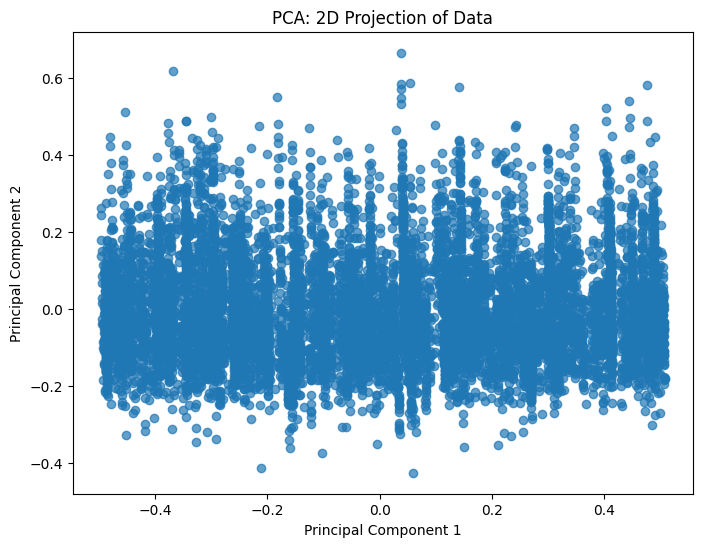

In [10]:
# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", pca.explained_variance_ratio_.cumsum())

# Visualize the principal components
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2D Projection of Data')
plt.show()


## 2.3 Clustering
#### How can you determine the optimal number of clusters for your data? Please use at least two methods and provide their results.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

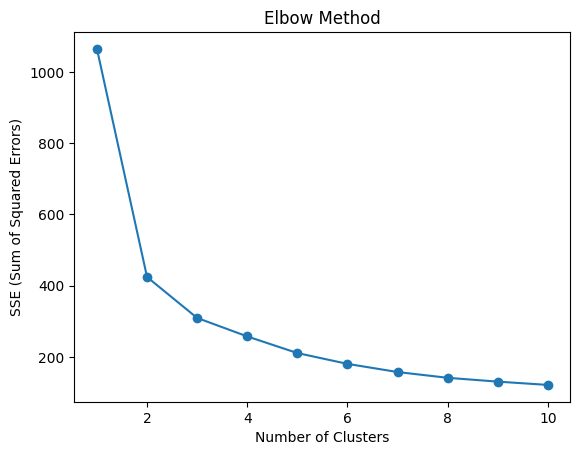

In [11]:
# Starting with the elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of clusters to try
range_clusters = range(1, 11)
inertia = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

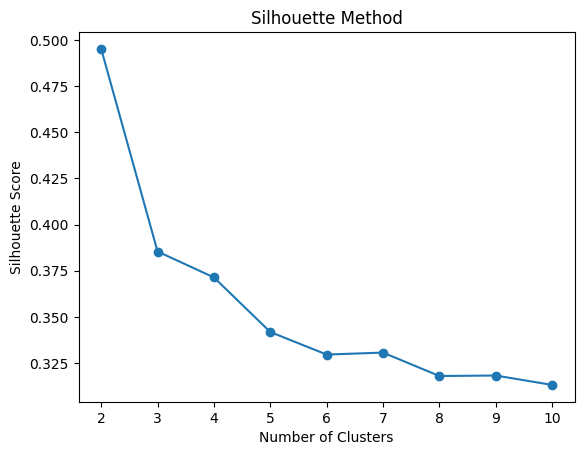

In [12]:
# Silhoutte method 
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(normalized_data)
    score = silhouette_score(normalized_data, labels)
    silhouette_scores.append(score)

# Plotting the Silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

the elbow method suggested 2 clusters while the silhoutte method 3

##### Implement the K-means clustering algorithm (not K-means++) through MapReduce. We request that you develop the algorithm from scratch based on what you've learned in class and run the algorithm on your data.

In [13]:
import numpy as np
from collections import defaultdict

def kmeans_mapreduce(D, k, max_iterations=100):
    # Step 1: Initialize centroids randomly
    np.random.seed(42)
    centroids = D[np.random.choice(D.shape[0], k, replace=False)]
    
    for iteration in range(max_iterations):
        
        # ----- Map Phase -----
        # Assign points to the closest centroid
        cluster_assignments = defaultdict(list)
        for point in D:
            distances = np.linalg.norm(point - centroids, axis=1)
            cluster_id = np.argmin(distances)
            cluster_assignments[cluster_id].append(point)
        
        # ----- Reduce Phase -----
        # Recalculate centroids by averaging the points in each cluster
        new_centroids = np.zeros_like(centroids)
        for cluster_id, points in cluster_assignments.items():
            new_centroids[cluster_id] = np.mean(points, axis=0)
        
        # Update centroids
        centroids = new_centroids

    # Assign final labels
    labels = np.zeros(D.shape[0], dtype=int)
    for i, point in enumerate(D):
        distances = np.linalg.norm(point - centroids, axis=1)
        labels[i] = np.argmin(distances)

    return centroids, labels

##### Implement the K-means++ algorithm from scratch and apply it to your data. Do you notice any differences between the results obtained using random initialization and those achieved with K-means++? Please explain your observations and discuss why these differences might occur.

In [14]:
import numpy as np

def kmeans_plus_plus(D, k, epsilon=1e-4, max_iterations=300):
    n_samples = D.shape[0]

    # Step 1: Initialize centroids using K-means++
    centroids = []
    centroids.append(D[np.random.randint(n_samples)])  # Randomly choose the first centroid

    for _ in range(1, k):
        # Calculate the squared distances from each point to the nearest centroid
        distances = np.min([np.linalg.norm(D - c, axis=1) for c in centroids], axis=0)
        
        # Choose the next centroid with probability proportional to the distance squared
        probs = distances / np.sum(distances)
        chosen_centroid = D[np.random.choice(range(n_samples), p=probs)]
        centroids.append(chosen_centroid)

    centroids = np.array(centroids)

    prev_centroids = np.zeros_like(centroids)
    labels = np.zeros(D.shape[0])

    # Step 2: Iterate through K-means steps
    for t in range(max_iterations):
        # Assignment step: Assign each point to the closest centroid
        for i in range(D.shape[0]):
            distances = np.linalg.norm(D[i] - centroids, axis=1)
            labels[i] = np.argmin(distances)

        # Update step: Update centroids by calculating the mean of points in each cluster
        for j in range(k):
            points_in_cluster = D[labels == j]
            if len(points_in_cluster) > 0:  # Avoid empty clusters
                centroids[j] = points_in_cluster.mean(axis=0)

        # Check for convergence: If centroids don't change, stop the iterations
        if np.linalg.norm(centroids - prev_centroids) <= epsilon:
            print(f"Converged after {t + 1} iterations.")
            break

        prev_centroids = centroids.copy()

    return centroids, labels


Observations: Differences Between Random Initialization and K-means++
When comparing the clustering results obtained using random initialization and K-means++ initialization, the following differences are typically observed:

Cluster Compactness (SSE):

K-means++: Results in tighter and more cohesive clusters, reflected in a lower Sum of Squared Errors (SSE).
Random Initialization: Often yields higher SSE due to suboptimal initial centroids, leading to poorly separated clusters.
Convergence Speed:

K-means++: Converges faster because the initial centroids are chosen to maximize distance between them, which reduces the likelihood of poor initial clustering.
Random Initialization: May take longer to converge, as the algorithm needs to compensate for poor initial centroid placement by iterating more times.
Cluster Quality (Silhouette Score):

K-means++: Tends to produce clusters with better-defined boundaries, resulting in higher silhouette scores.
Random Initialization: May create poorly defined clusters, resulting in lower silhouette scores.
Stability:

K-means++: Provides more consistent results across multiple runs, as the initialization reduces the randomness involved in centroid selection.
Random Initialization: Can lead to highly variable results depending on the random starting points.

### 2.3

Agglomerative Hierarchical Clustering algorithm is another good choise for clustering since it doesn't require you to specify the number of clusters in advance, it can find clusters with arbitrary shapes (especially when using complete linkage or average linkage). It's more flexible than K-means in this sense. Additionally the dendrogram helps you visualize how clusters are formed and decide on the optimal number of clusters based on the tree structure.


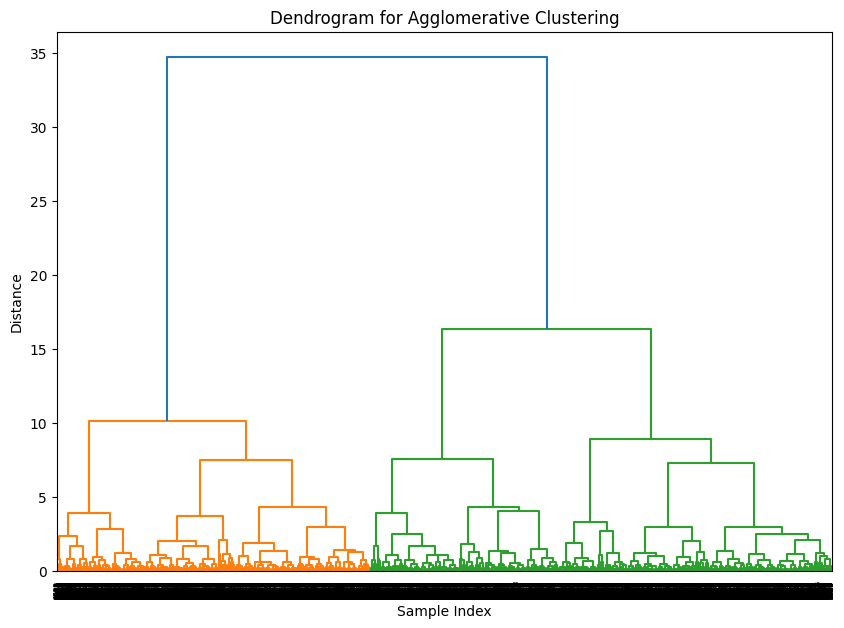

In [24]:
import scipy.cluster.hierarchy as sch

# Compute the linkage matrix
Z = sch.linkage(normalized_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(Z)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


#### 2.4 Best Algorithm

##### 2.4.1 K-MEANS

In [16]:
# Set the number of clusters to the optimal number k based on any of the methods previously.
k = 4
centroids, labels = kmeans_mapreduce(normalized_data, k)

print(f"Final centroids: \n{centroids}")
print(f"Cluster labels: \n{labels}")

Final centroids: 
[[0.72828464 0.49991538 0.05527531]
 [0.45479663 0.69024988 0.01781333]
 [0.66644548 0.16468218 0.04625954]
 [0.70754011 0.85117718 0.05214383]]
Cluster labels: 
[3 2 0 ... 2 2 2]


##### 2.4.2 Select three distinct metrics to assess the quality of the clusters. Describe each metric in detail, including the specific aspects they evaluate to determine the effectiveness of the clustering model.
- Each metric evaluates different aspects of clustering:
    - Silhouette Score : The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. balances cohesion and separation at the data-point level.
    - Inertia: Inertia focuses on intra-cluster cohesion, it measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.
    - Davies-Bouldin Index: This index balances compactness and separation at the cluster level. The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.


##### 2.4.3 Apply the three clustering algorithms used in the prior section to partition the data into k clusters. Then, evaluate each model's clustering quality using the selected metrics. Summarize your findings by comparing the results of each algorithm based on the metric evaluations.


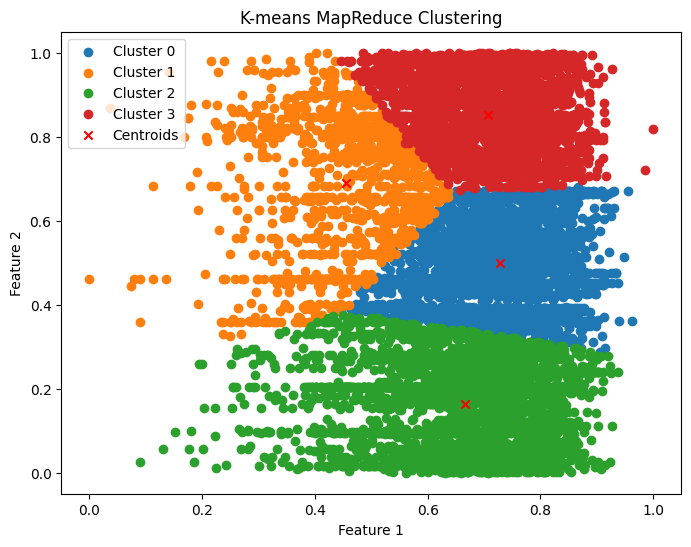

In [17]:
### K-MEANS

# Visualizing the result 
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Scatter plot for the data points with their assigned labels
for i in range(k):
    cluster_points = normalized_data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i}")

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means MapReduce Clustering')
plt.legend()
plt.show()


In [18]:
## K-MEANS ++ 
centroids1, labels1 = kmeans_plus_plus(normalized_data, k)

# Output the centroids and labels
print("Centroids:", centroids1)
print("Labels:", labels1)

Converged after 51 iterations.
Centroids: [[0.67189063 0.15373438 0.04790768]
 [0.68418964 0.47016223 0.04558677]
 [0.49140502 0.79178705 0.02055452]
 [0.74286309 0.82341728 0.06121763]]
Labels: [3. 0. 1. ... 0. 0. 0.]


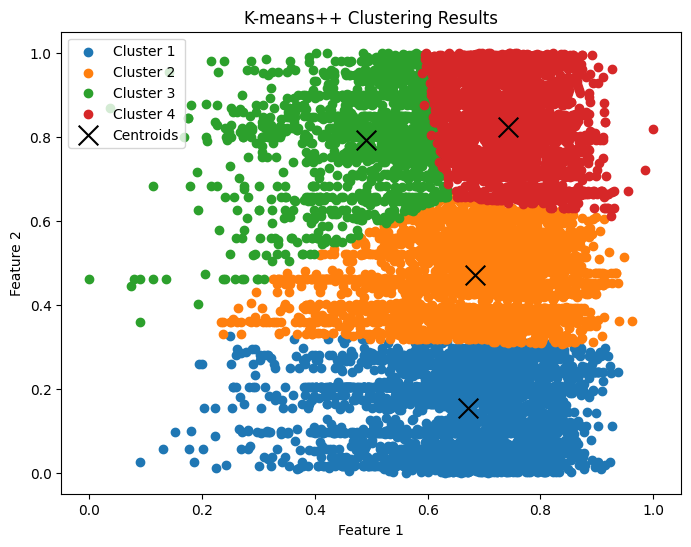

In [19]:
# Plotting the clusters
plt.figure(figsize=(8, 6))

# Loop over each cluster and plot the points
for i in range(k):
    # Select points belonging to cluster 'i'
    cluster_points = normalized_data[labels1 == i]
    
    # Plot these points
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')

# Plot centroids
plt.scatter(centroids1[:, 0], centroids1[:, 1], marker='x', color='black', s=200, label='Centroids')

# Set plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means++ Clustering Results')

# Show the legend
plt.legend()

# Display the plot
plt.show()

From the visual analysis of the images, K-means++ seems to perform better than K-means in this particular case. The clusters in the K-means++ image are more distinct, with better separation and positioning of centroids. The K-means algorithm, while still producing reasonable clusters, appears to struggle with the initial random centroids, leading to less optimal results.

In [25]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.cluster import KMeans

# K-means Clustering
kmeans = KMeans(n_clusters=4, init='random', random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_data)

# K-means++ Clustering
kmeans_plus_plus = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_plus_plus_labels = kmeans_plus_plus.fit_predict(normalized_data)

# Evaluate K-means
silhouette_kmeans = silhouette_score(normalized_data, kmeans_labels)
db_kmeans = davies_bouldin_score(normalized_data, kmeans_labels)
inertia_kmeans = kmeans.inertia_

# Evaluate K-means++
silhouette_kmeans_pp = silhouette_score(normalized_data, kmeans_plus_plus_labels)
db_kmeans_pp = davies_bouldin_score(normalized_data, kmeans_plus_plus_labels)
inertia_kmeans_pp = kmeans_plus_plus.inertia_

# Print the results
print("K-means Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_kmeans}")
print(f"Davies-Bouldin Index: {db_kmeans}")
print(f"Inertia: {inertia_kmeans}")

print("\nK-means++ Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_kmeans_pp}")
print(f"Davies-Bouldin Index: {db_kmeans_pp}")
print(f"Inertia: {inertia_kmeans_pp}")


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Clustering Evaluation:
Silhouette Score: 0.37729803384894717
Davies-Bouldin Index: 0.935629690059789
Inertia: 257.7770413421155

K-means++ Clustering Evaluation:
Silhouette Score: 0.3713900288342448
Davies-Bouldin Index: 0.9552008667826901
Inertia: 257.7874931719002


In [27]:
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt

n_clusters = 4
hierarchical_labels = fcluster(Z, n_clusters, criterion='maxclust')

# Evaluate clustering quality
silhouette_hc = silhouette_score(normalized_data, hierarchical_labels)
davies_bouldin_hc = davies_bouldin_score(normalized_data, hierarchical_labels)

# Print the evaluation results
print("Hierarchical Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_hc}")
print(f"Davies-Bouldin Index: {davies_bouldin_hc}")

Hierarchical Clustering Evaluation:
Silhouette Score: 0.3166700682870408
Davies-Bouldin Index: 1.0438568870646099


The K-means seems to be the best method overall in terms of both Silhouette Score and Davies-Bouldin Index, suggesting well-separated and compact clusters. While K-means++ performed very similarly to K-means but has slightly worse scores, indicating that its centroid initialization strategy did not significantly improve the results for this dataset.
In contrast the hierarchical clustering had the lowest performance, with lower Silhouette Score and higher Davies-Bouldin Index, likely due to its sensitivity to noise and outliers.